In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [146]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [147]:
### Your code is here
data.describe(include=object)



,Gender,Vehicle_Age,Vehicle_Damage
count,10000,10000,10000
unique,2,3,2
top,Male,1-2 Year,Yes
freq,5437,5263,5143


In [148]:
cat_cols = data.loc[:,data.dtypes==np.object].columns
cat_cols
cols_for_ohe_indx = [list(data.columns).index(col) for col in cat_cols]
cols_for_ohe_indx

[0, 5, 6]

In [149]:
data = pd.get_dummies(data=data, columns=cat_cols, drop_first=True)

In [151]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,1,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,1,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,1,14.0,1,25426.0,152.0,247,0,0,1,0,0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here
model = GradientBoostingClassifier(learning_rate=1,
                                   random_state=1,
                                   n_estimators=100)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

In [59]:
model.predict_proba(X_test)[:, 1]

array([1.51732090e-03, 4.13470876e-01, 1.27105663e-04, ...,
       3.05178623e-01, 4.52218292e-01, 5.75114509e-04])

In [65]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1770
           1       0.31      0.24      0.27       230

    accuracy                           0.85      2000
   macro avg       0.61      0.59      0.59      2000
weighted avg       0.84      0.85      0.84      2000



In [61]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

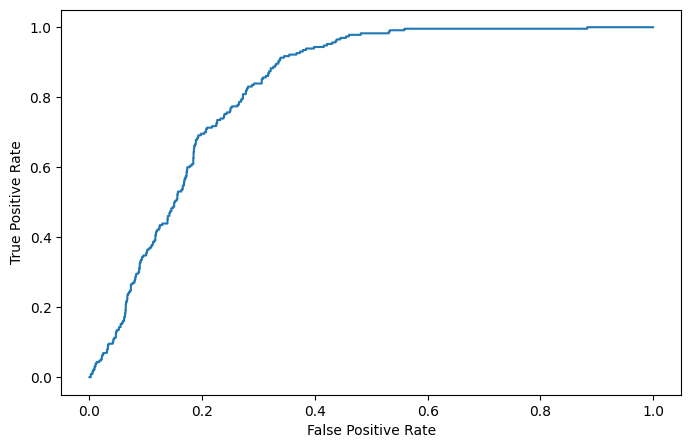

In [62]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay


RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [64]:
auc(fpr, tpr).round(3)

0.828

In [67]:
f1_score(y_test, model.predict(X_test))

0.27027027027027023

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [66]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [71]:
### Your code is here
result = []
for estimator in n_estimators_list:
    for lr in learning_rate_list:
        model_2 = GradientBoostingClassifier(learning_rate=lr,
                                   random_state=1,
                                   max_depth=5,
                                   n_estimators=estimator)
        model_2.fit(X_train, y_train)
        
        result.append([f1_score(y_test, model_2.predict(X_test), average='weighted'), lr, estimator])
        

In [86]:
np.array(result)

array([[8.35983247e-01, 1.00000000e+00, 5.00000000e+00],
       [8.31970679e-01, 1.00000000e-01, 5.00000000e+00],
       [8.31007958e-01, 1.00000000e-02, 5.00000000e+00],
       [8.38400336e-01, 1.00000000e+00, 1.00000000e+01],
       [8.31970679e-01, 1.00000000e-01, 1.00000000e+01],
       [8.31007958e-01, 1.00000000e-02, 1.00000000e+01],
       [8.44182285e-01, 1.00000000e+00, 2.00000000e+01],
       [8.31717148e-01, 1.00000000e-01, 2.00000000e+01],
       [8.31007958e-01, 1.00000000e-02, 2.00000000e+01],
       [8.36738988e-01, 1.00000000e+00, 5.00000000e+01],
       [8.31626893e-01, 1.00000000e-01, 5.00000000e+01],
       [8.32224114e-01, 1.00000000e-02, 5.00000000e+01],
       [8.37489811e-01, 1.00000000e+00, 1.00000000e+02],
       [8.37727917e-01, 1.00000000e-01, 1.00000000e+02],
       [8.31970679e-01, 1.00000000e-02, 1.00000000e+02],
       [8.41932877e-01, 1.00000000e+00, 2.00000000e+02],
       [8.43124324e-01, 1.00000000e-01, 2.00000000e+02],
       [8.31717148e-01, 1.00000

In [99]:
df_result = pd.DataFrame(result)

In [105]:
df_result[df_result[0] == df_result[0].max()]

,0,1,2
21,0.845763,1.0,1000


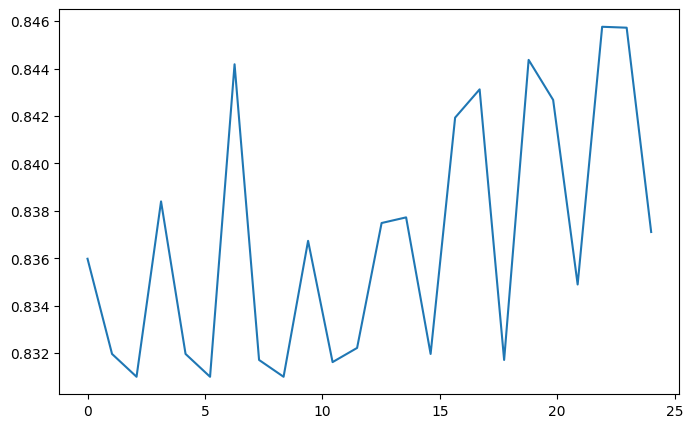

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

plt.plot(np.linspace(0, df_result.shape[0], df_result.shape[0]), df_result[0])

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [111]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

          0  1
0  0.834369  2
          0  1
0  0.816024  2


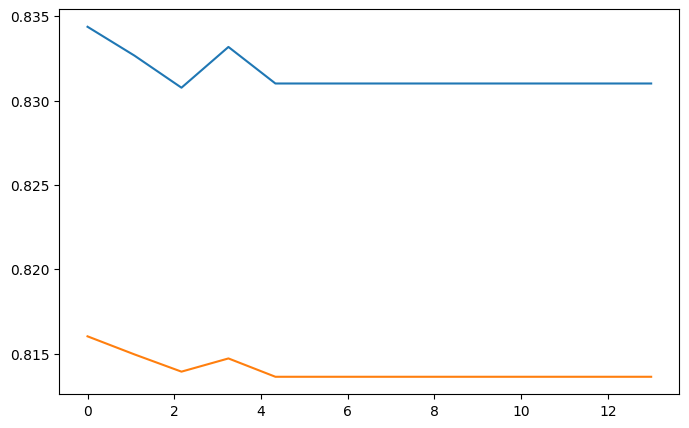

In [125]:
result_rf_1 = []
result_rf_1_train = []
for estimator in n_estimators_list:

    model_rf_1 = RandomForestClassifier(random_state=1,
                                   max_depth=5,
                                   n_estimators=estimator)
    model_rf_1.fit(X_train, y_train)
        
    result_rf_1.append([f1_score(y_test, model_rf_1.predict(X_test), average='weighted'), estimator])
    result_rf_1_train.append([f1_score(y_train, model_rf_1.predict(X_train), average='weighted'), estimator])
result_df_rf_1 = pd.DataFrame(result_rf_1)
result_df_rf_1_train = pd.DataFrame(result_rf_1_train)
print(result_df_rf_1[result_df_rf_1[0] == result_df_rf_1[0].max()])
print(result_df_rf_1_train[result_df_rf_1_train[0] == result_df_rf_1_train[0].max()])
plt.plot(np.linspace(0, result_df_rf_1.shape[0], result_df_rf_1.shape[0]), result_df_rf_1[0])
plt.plot(np.linspace(0, result_df_rf_1_train.shape[0], result_df_rf_1_train.shape[0]), result_df_rf_1_train[0])

          0   1
5  0.847836  20
      0     1
8   1.0   100
9   1.0   200
10  1.0   700
11  1.0  1000
12  1.0  2000


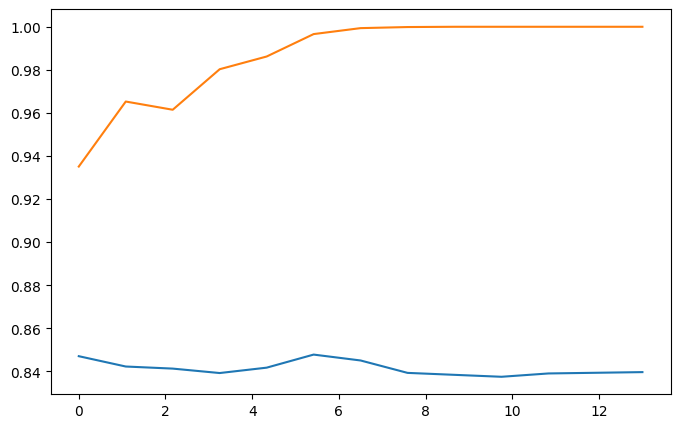

In [128]:
result_rf_2 = []
result_rf_2_train = []
for estimator in n_estimators_list:

    model_rf_2 = RandomForestClassifier(random_state=1,
                                   max_depth=5000,
                                   n_estimators=estimator)
    model_rf_2.fit(X_train, y_train)
        
    result_rf_2.append([f1_score(y_test, model_rf_2.predict(X_test), average='weighted'), estimator])
    result_rf_2_train.append([f1_score(y_train, model_rf_2.predict(X_train), average='weighted'), estimator])

result_df_rf_2 = pd.DataFrame(result_rf_2)
result_df_rf_2_train = pd.DataFrame(result_rf_2_train)
print(result_df_rf_2[result_df_rf_2[0] == result_df_rf_2[0].max()])
print(result_df_rf_2_train[result_df_rf_2_train[0] == result_df_rf_2_train[0].max()])
plt.plot(np.linspace(0, result_df_rf_2.shape[0], result_df_rf_2.shape[0]), result_df_rf_2[0])
plt.plot(np.linspace(0, result_df_rf_2_train.shape[0], result_df_rf_2_train.shape[0]), result_df_rf_2_train[0])

           0     1
11  0.845724  1000
      0     1
12  1.0  2000


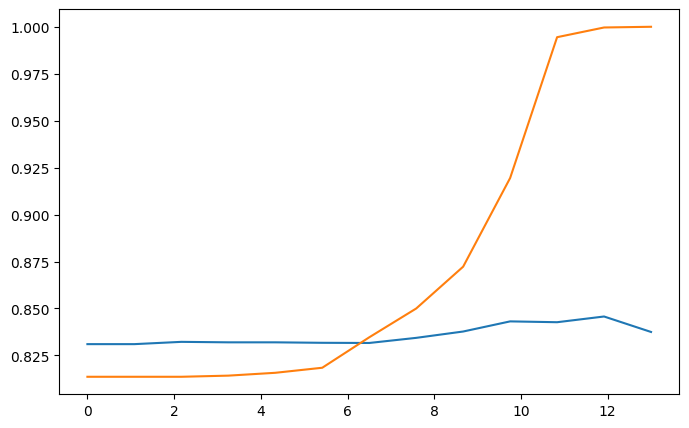

In [130]:
result_gb_1 = []
result_gb_1_train = []
for estimator in n_estimators_list:

    model_gb_1 = GradientBoostingClassifier(random_state=1,
                                   max_depth=5,
                                   n_estimators=estimator)
    model_gb_1.fit(X_train, y_train)
        
    result_gb_1.append([f1_score(y_test, model_gb_1.predict(X_test), average='weighted'), estimator])
    result_gb_1_train.append([f1_score(y_train, model_gb_1.predict(X_train), average='weighted'), estimator])

result_df_gb_1 = pd.DataFrame(result_gb_1)
result_df_gb_1_train = pd.DataFrame(result_gb_1_train)
print(result_df_gb_1[result_df_gb_1[0] == result_df_gb_1[0].max()])
print(result_df_gb_1_train[result_df_gb_1_train[0] == result_df_gb_1_train[0].max()])
plt.plot(np.linspace(0, result_df_gb_1.shape[0], result_df_gb_1.shape[0]), result_df_gb_1[0])
plt.plot(np.linspace(0, result_df_gb_1_train.shape[0], result_df_gb_1_train.shape[0]), result_df_gb_1_train[0])

          0  1
3  0.835411  5
      0     1
3   1.0     5
4   1.0    10
5   1.0    20
6   1.0    50
7   1.0    70
8   1.0   100
9   1.0   200
10  1.0   700
11  1.0  1000
12  1.0  2000


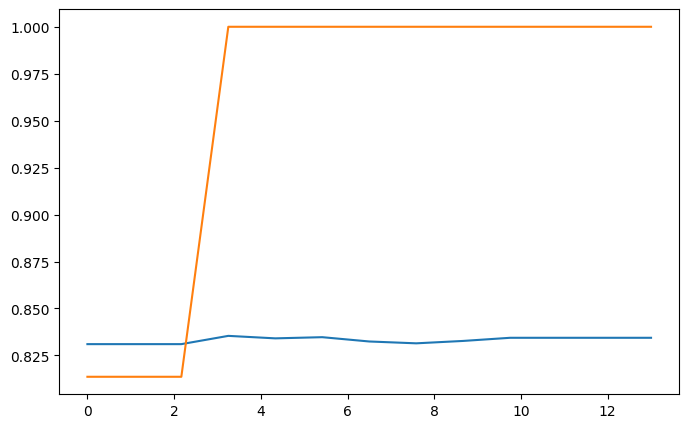

In [131]:
result_gb_2 = []
result_gb_2_train = []
for estimator in n_estimators_list:

    model_gb_2 = GradientBoostingClassifier(random_state=1,
                                   max_depth=5000,
                                   n_estimators=estimator)
    model_gb_2.fit(X_train, y_train)
        
    result_gb_2.append([f1_score(y_test, model_gb_2.predict(X_test), average='weighted'), estimator])
    result_gb_2_train.append([f1_score(y_train, model_gb_2.predict(X_train), average='weighted'), estimator])

result_df_gb_2 = pd.DataFrame(result_gb_2)
result_df_gb_2_train = pd.DataFrame(result_gb_2_train)
print(result_df_gb_2[result_df_gb_2[0] == result_df_gb_2[0].max()])
print(result_df_gb_2_train[result_df_gb_2_train[0] == result_df_gb_2_train[0].max()])
plt.plot(np.linspace(0, result_df_gb_2.shape[0], result_df_gb_2.shape[0]), result_df_gb_2[0])
plt.plot(np.linspace(0, result_df_gb_2_train.shape[0], result_df_gb_2_train.shape[0]), result_df_gb_2_train[0])

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [132]:
from catboost import CatBoostClassifier

### Your code is here
data = pd.read_csv('vehicle_insurance.csv')

data



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


In [133]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [136]:
cat_cols = data.loc[:,data.dtypes==np.object].columns
cat_cols_indx = [list(X_train.columns).index(col) for col in cat_cols]

In [137]:
catboost = CatBoostClassifier()

catboost.fit(X_train, y_train, cat_features=cat_cols_indx)

Learning rate set to 0.025035
0:	learn: 0.6524209	total: 164ms	remaining: 2m 44s
1:	learn: 0.6213114	total: 184ms	remaining: 1m 31s
2:	learn: 0.5922961	total: 205ms	remaining: 1m 8s
3:	learn: 0.5658834	total: 228ms	remaining: 56.9s
4:	learn: 0.5423457	total: 252ms	remaining: 50s
5:	learn: 0.5180857	total: 275ms	remaining: 45.6s
6:	learn: 0.4986798	total: 298ms	remaining: 42.2s
7:	learn: 0.4802832	total: 317ms	remaining: 39.3s
8:	learn: 0.4619128	total: 339ms	remaining: 37.4s
9:	learn: 0.4465202	total: 361ms	remaining: 35.8s
10:	learn: 0.4341692	total: 383ms	remaining: 34.4s
11:	learn: 0.4204912	total: 404ms	remaining: 33.2s
12:	learn: 0.4147382	total: 425ms	remaining: 32.3s
13:	learn: 0.4094293	total: 449ms	remaining: 31.6s
14:	learn: 0.3996664	total: 470ms	remaining: 30.8s
15:	learn: 0.3902804	total: 489ms	remaining: 30.1s
16:	learn: 0.3851970	total: 509ms	remaining: 29.5s
17:	learn: 0.3768978	total: 530ms	remaining: 28.9s
18:	learn: 0.3694314	total: 550ms	remaining: 28.4s
19:	learn: 

In [142]:
f1_score(y_train, catboost.predict(X_train), average='weighted')

0.8789303732850496

In [143]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


In [140]:
catboost.feature_importances_

array([ 3.1033428 , 11.36658464,  0.03227638,  7.43228013, 27.35891126,
        4.74671151, 21.36760853,  9.26128996,  6.2198574 ,  9.11113739])

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

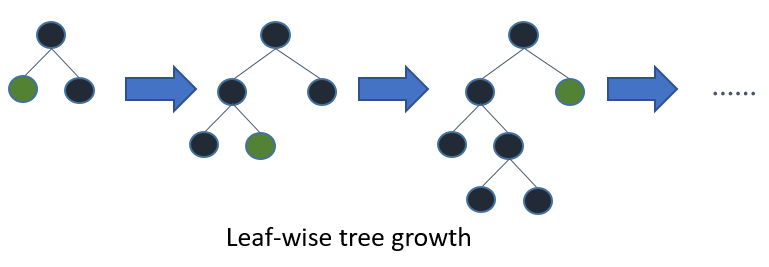

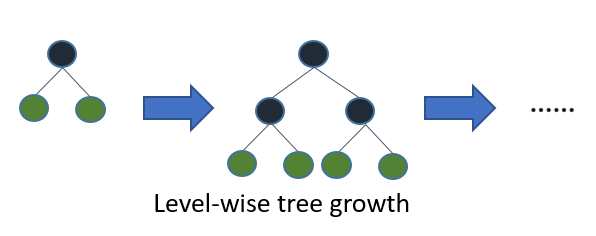

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [153]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here
grid = GridSearchCV(LGBMClassifier(), params)
grid.fit(X_train, y_train)



GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [155]:
print(f"Best CV score{grid.best_score_:.5f}")
print(grid.best_params_)
print(f"Best score test:{-grid.score(X_test, y_test):.4f}")

Best CV score0.87288
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Best score test:-0.8850


In [157]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': 'warn',
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [100, 500, 1000, 2000],
  'max_depth': [2, 3, 5, 100],
  'learning_rate': [0.1, 0.01, 0.001]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [159]:
grid.set_params(estimator__learning_rate=0.01, estimator__max_depth=2)

GridSearchCV(estimator=LGBMClassifier(learning_rate=0.01, max_depth=2),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [160]:
grid.fit(X_train, y_train)

print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.89      0.83      2000

